In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Karthaus/karthaus_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 120300 × 4915
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

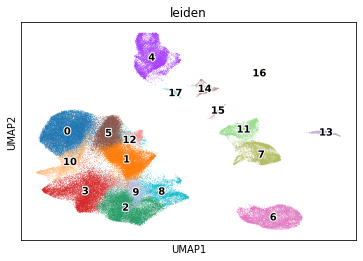

In [3]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [14]:
sc.tl.leiden(adata, restrict_to = ('leiden', ['3']), resolution = .3)

running Leiden clustering
    finished: found 20 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:02)


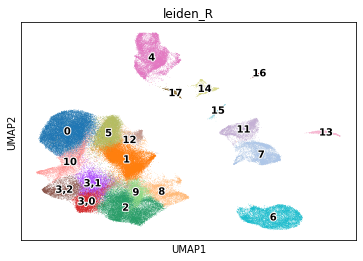

In [15]:
sc.pl.umap(adata, color = 'leiden_R', legend_loc = 'on data', legend_fontoutline = 2)

In [20]:
# perform a wilcoxon rank sum test
sc.tl.rank_genes_groups(adata, groupby = 'leiden_R', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:05:09)


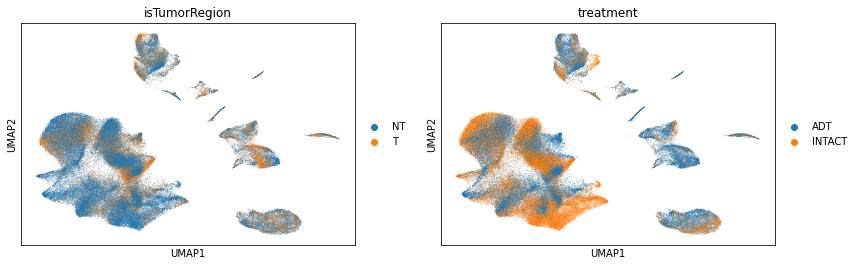

In [6]:
sc.pl.umap(adata, color = ['isTumorRegion', 'treatment'])

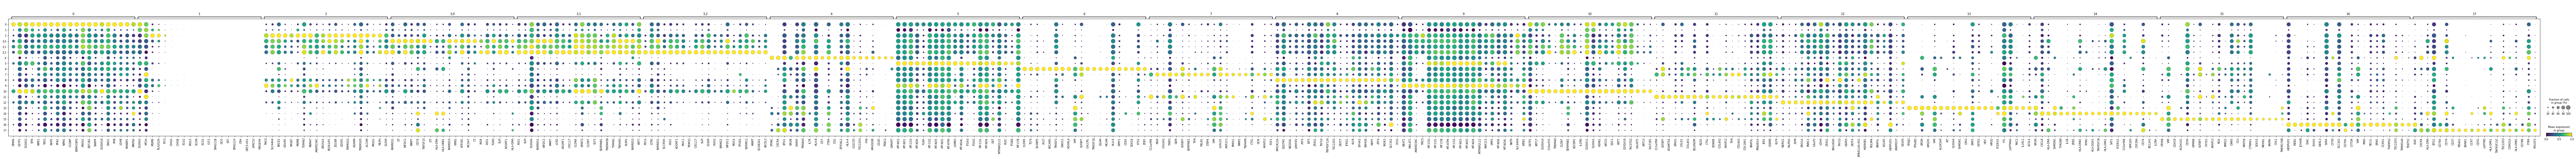

In [12]:
# check top marker genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 20, min_logfoldchange = 2, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

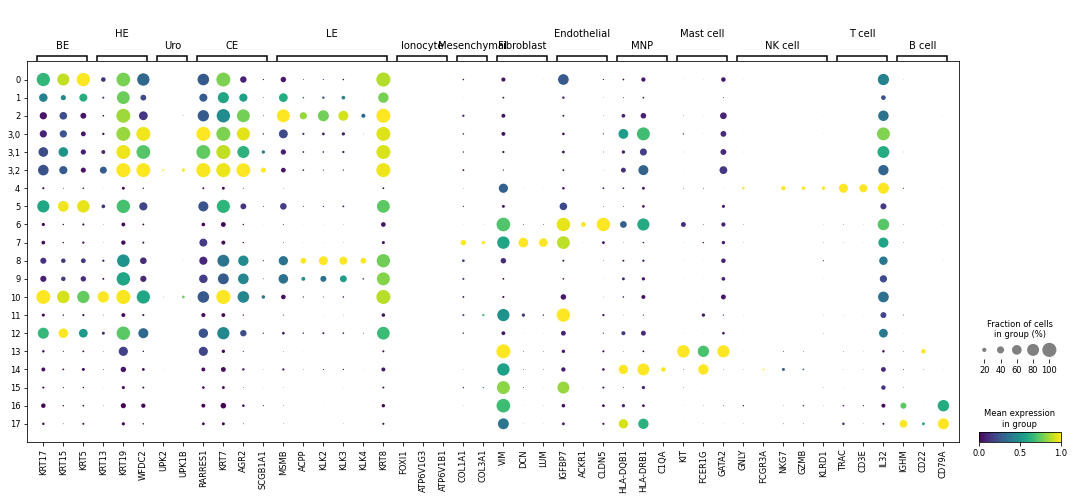

In [5]:
marker_dict = {'BE':['KRT17', 'KRT15', 'KRT5'],
               'HE\n':['KRT13', 'KRT19', 'WFDC2'],
               'Uro':['UPK2', 'UPK1B'],
               'CE':['RARRES1', 'KRT7', 'AGR2', 'SCGB1A1'],
               'LE\n':['MSMB', 'ACPP', 'KLK2', 'KLK3', 'KLK4', 'KRT8'],
               'Ionocyte':['FOXI1', 'ATP6V1G3', 'ATP6V1B1'],
               'Mesenchymal':['COL1A1', 'COL3A1'],
               'Fibroblast':['VIM', 'DCN', 'LUM'],
               'Endothelial\n':['IGFBP7', 'ACKR1', 'CLDN5'],
               'MNP':['HLA-DQB1', 'HLA-DRB1', 'C1QA'],
               'Mast cell\n':['KIT', 'FCER1G', 'GATA2'],
               'NK cell':['GNLY', 'FCGR3A', 'NKG7', 'GZMB', 'KLRD1'],
               'T cell\n':['TRAC', 'CD3E', 'IL32'],
               'B cell':['IGHM', 'CD22', 'CD79A']}
sc.pl.dotplot(adata, 
                     marker_dict, 
                     standard_scale = 'var', 
                     groupby = 'leiden_R', 
                     var_group_rotation = False, 
                     linewidth = 0,
                     dendrogram = False,
                     color_map = 'viridis')

In [23]:
# create a tmp file because i need to go out.
adata.write_h5ad('dataset/Karthaus/karthaus_processed.h5ad', compression = 'gzip')

In [2]:
adata = sc.read_h5ad('dataset/Karthaus/karthaus_processed.h5ad')

In [12]:
from tools import returnDEres

In [9]:
# returnDEres(adata, column = '11').head(10)

In [11]:
# returnDEres(adata, column = '18').head(20)

In [12]:
# returnDEres(adata, column = '2').head(20)

In [14]:
from tools import cmp

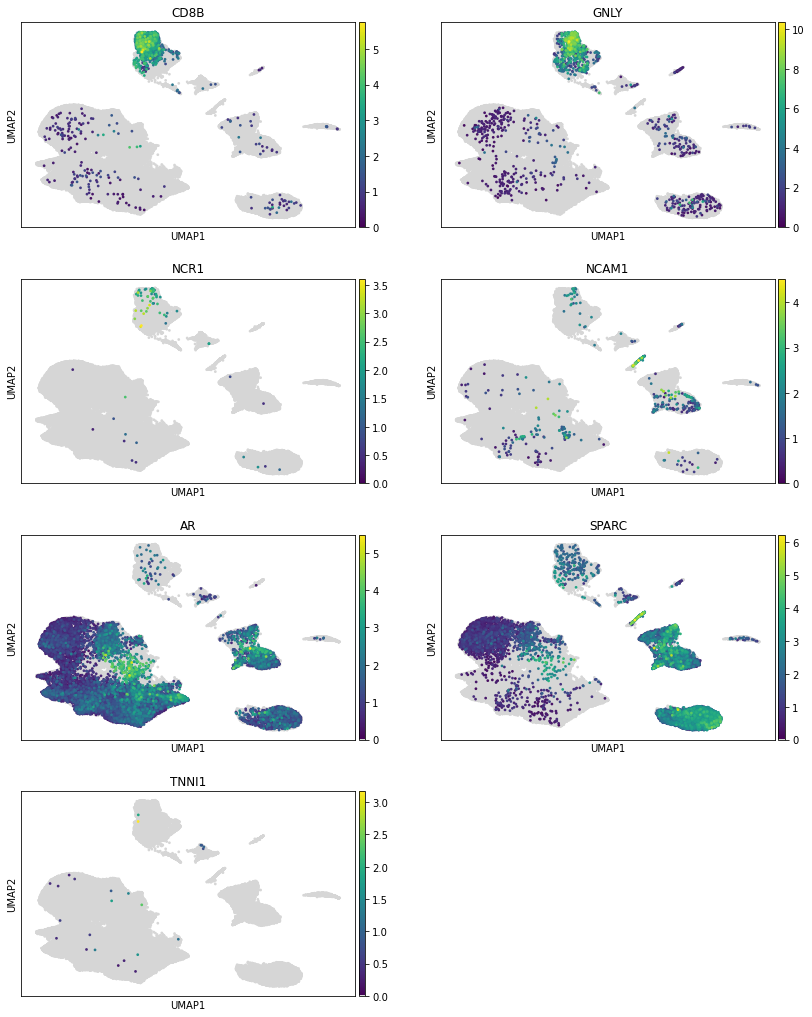

In [5]:
sc.pl.umap(adata, color = ['CD8B', 'GNLY', 'NCR1', 'NCAM1', 'AR', 'SPARC', 'TNNI1'], color_map = cmp(), ncols = 2, size =30)

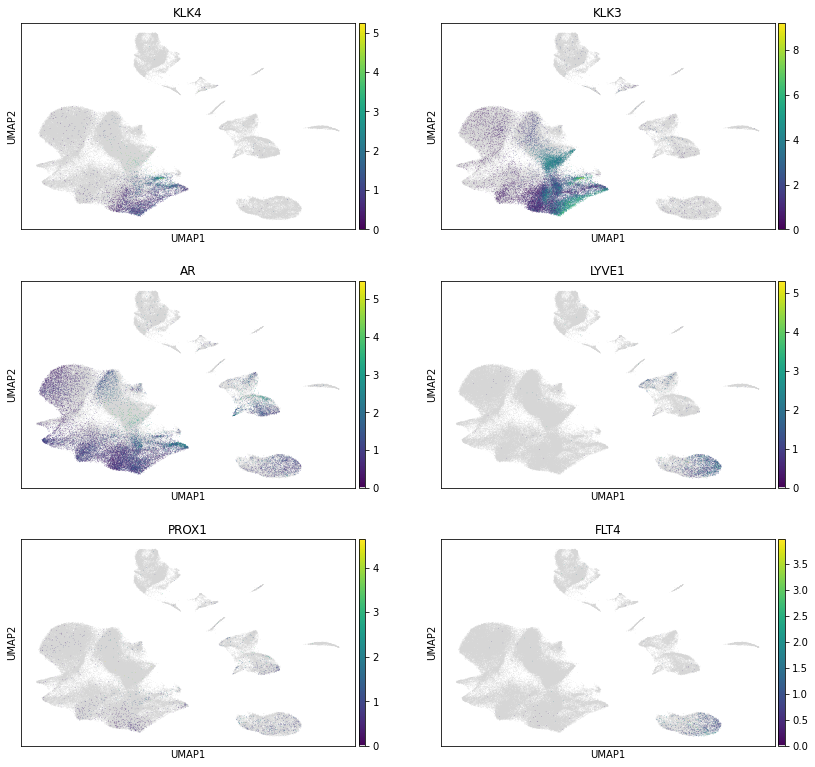

In [19]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'AR', 'LYVE1', 'PROX1', 'FLT4'], color_map = cmp(), ncols = 2)

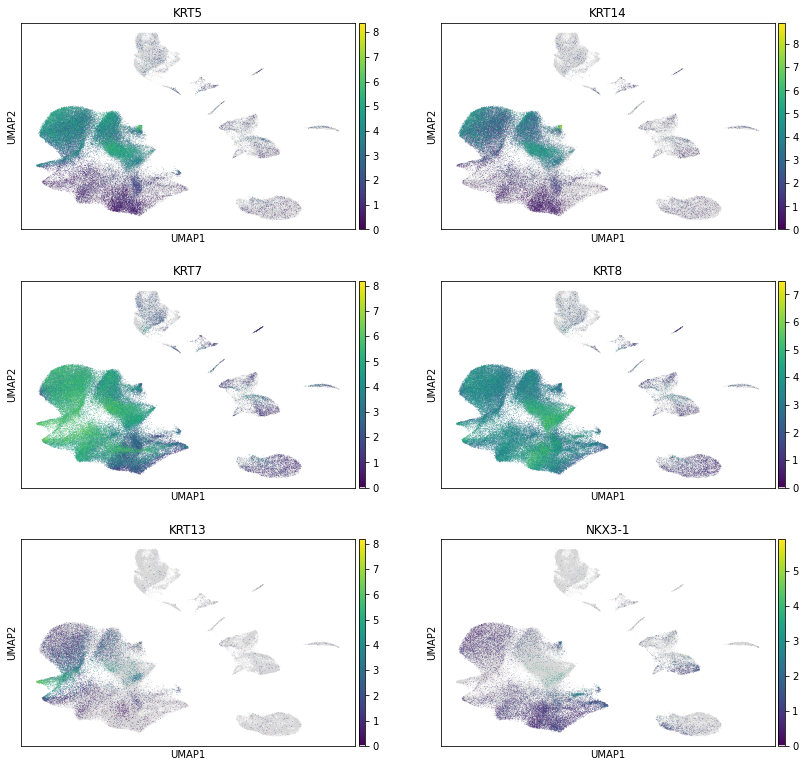

In [15]:
sc.pl.umap(adata, color = ['KRT5', 'KRT14', 'KRT7', 'KRT8', 'KRT13', 'NKX3-1'], color_map = cmp(), ncols = 2)

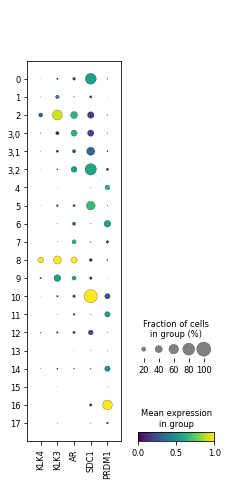

In [16]:
sc.pl.dotplot(adata, ['KLK4', 'KLK3', 'AR', 'SDC1', 'PRDM1'], groupby = 'leiden_R', standard_scale = 'var', color_map = 'viridis')

In [10]:
cols = {'BE': '#1c4481',
        'HE': '#60688d',
        'CE': '#1f77b4',
        'LE': '#5b8ba1',
        'Fibroblast': '#59a14f',
        'Endothelial': '#8cd17d',
        'Lymphatic':'#f7fcb9',
        'MNP': '#c7233b',
        'Mast cell': '#d37295',
#         'NK cell': '#ff9d9a',
        'T cell': '#f28e2b',
        'B cell': '#fcbf10',
        'Plasmablast': '#fcbf10',
       }

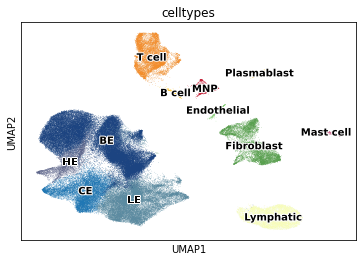

In [11]:
celltypes = {
    '0':'BE',
    '1':'BE',
    '2':'LE',
    '3,0':'CE',
    '3,1':'CE',
    '3,2':'CE',
    '4':'T cell',
    '5':'BE',
    '6':'Lymphatic',
    '7':'Fibroblast',
    '8':'LE',
    '9':'LE',
    '10':'HE',
    '11':'Fibroblast',
    '12':'BE',
    '13':'Mast cell',
    '14':'MNP',
    '15':'Endothelial',
    '16':'Plasmablast',
    '17':'B cell',
}
adata.obs['celltypes'] = [celltypes[l] for l in adata.obs['leiden_R']]
adata.obs['celltypes'] = adata.obs['celltypes'].astype('category')
adata.obs['celltypes'] = adata.obs['celltypes'].cat.reorder_categories([k for k in cols.keys() if k in list(adata.obs['celltypes'])])
sc.pl.umap(adata, color = 'celltypes', palette = cols, legend_loc = 'on data', legend_fontoutline = 2)

In [17]:
adata

AnnData object with n_obs × n_vars = 120300 × 4915
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'isTumorRegion_colors', 'treatment_colors', 'celltypes_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [18]:
adata.write_h5ad('dataset/Karthaus/karthaus_processed.h5ad', compression = 'gzip')

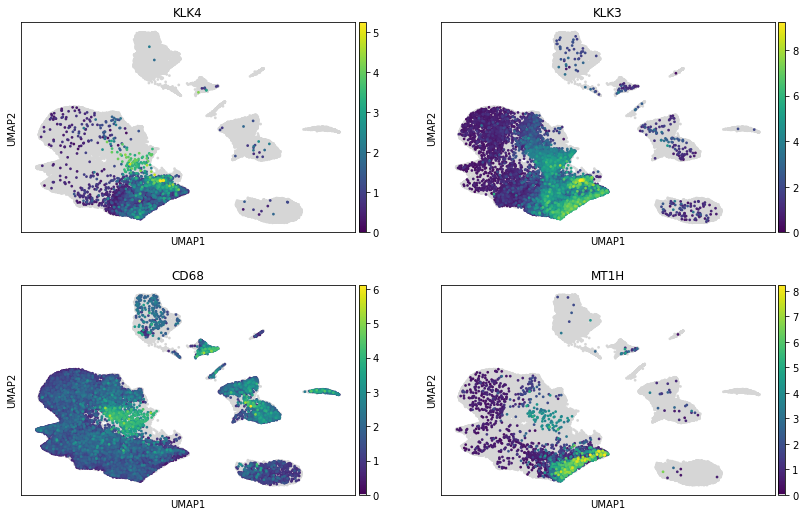

In [19]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'CD68', 'MT1H'], color_map = cmp(), ncols = 2, size = 30)